# **Median filter**

### *Definition*

Median filtering is a common digital image processing technique used to reduce noise while preserving the edges and details of an image. It operates by replacing each pixel’s value with the median value of the intensity levels in a local neighborhood around that pixel.

### *How the algorithm works?*


The median filter considers each pixel in the image in turn and looks at its nearby neighbors to decide whether or not it is representative of its surroundings. Then it replaces the pixel value with the median of neighboring pixel values. The median is calculated by first sorting all the pixel values from the surrounding neighborhood into numerical order and then replacing the pixel being considered with the middle pixel value. (If the neighborhood under consideration contains an even number of pixels, the average of the two middle pixel values is used.)

<div style="text-align:center;">
    <img src="median.png" alt="Example Image" width="500">
</div>

### *Advantages of the algorithm*

By calculating the median value of a neighborhood rather than the mean one, the median filter has two main advantages over the mean filter:

• the median is a more robust average than the mean and so a single very
unrepresentative pixel in a neighborhood will not affect the median value significantly;

• since the median value must actually be the value of one of the pixels in the neigh- borhood, the median filter does not create new unrealistic pixel values when the filter straddles an edge. For this reason the median filter is much better at preserving sharp edges than the mean filter.

### *Mathematical representation*

$$G(x,y)=median(I(j, i)|j=x-n,...,x+n, i = y-n, ..., y+n)$$

Where:
- $i$ is for row index;
- $j$ if for column index;
- $n$ for number of pixel from center of filter to the edge;
- $I$ for matrix from image;
- $G$ for matrix from resulting image;

### **Implementation**

### **Step 1:** import libraries and load an image

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2 as cv

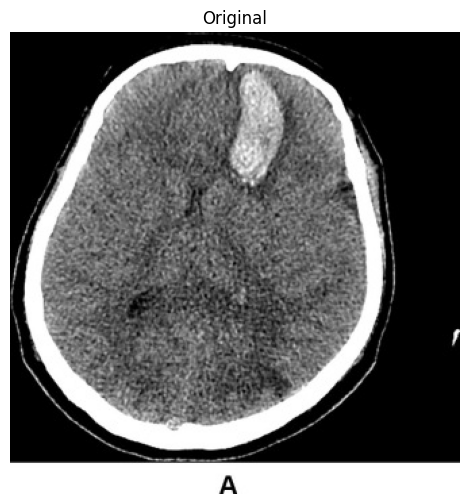

In [9]:
photo = cv.imread('image.jpg')

plt.figure(figsize=(8, 6))
plt.imshow(photo)
plt.title('Original')
plt.axis('off') 
plt.show()

### **Step 2**: implement an algorithm using built-in functions

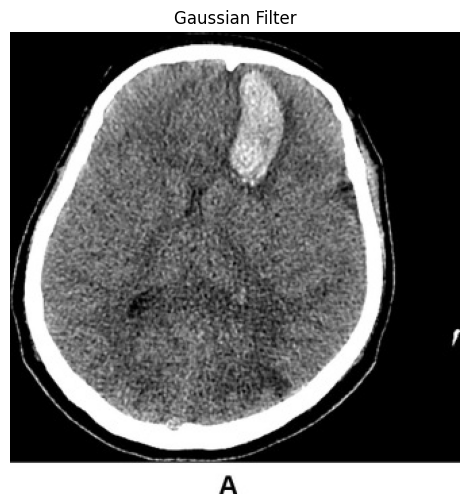

In [10]:
# Built-in function

gaussian = cv.GaussianBlur(photo, (3, 3), 0)

plt.figure(figsize=(8, 6))
plt.imshow(photo)
plt.title('Median Filter')
plt.axis('off') 
plt.show()


### **Step 3:** implement an algorithm manually

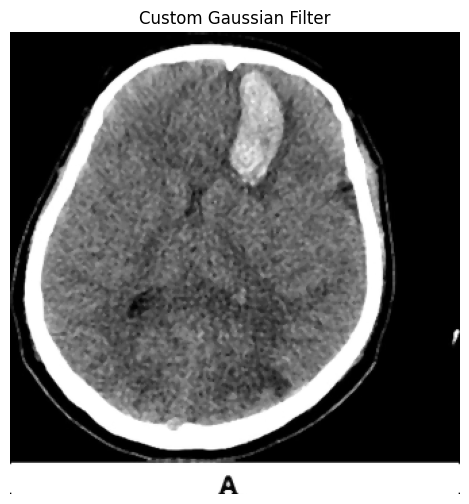

In [11]:
# Custom Median Filter

def filter_median(img, kernel_size=3):

    # Pad the image with zeros
    padded_img = np.pad(img, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), mode='constant')
    
    # Create an empty result array
    result = np.zeros_like(img)
    
    # Apply median filter
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            # Extract the neighborhood
            neighborhood = padded_img[i:i+kernel_size, j:j+kernel_size]
            # Compute median and assign it to the result
            result[i, j] = np.median(neighborhood)
    
    return result

# Load the image
photo = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)

kernel_size = 3

blurred_image_custom = filter_median(photo, kernel_size)

plt.figure(figsize=(8, 6))
plt.imshow(blurred_image_custom, cmap='gray')
plt.title('Custom Median Filter')
plt.axis('off') 
plt.show()